In [30]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
#Retrieve pickle object
fileObj = open('data_algos.pkl', 'rb')
all_generations = pickle.load(fileObj)
fileObj.close()

In [32]:
#creating one DataFrame for each selection method
random_df = pd.DataFrame(all_generations[0])
ranked_df = pd.DataFrame(all_generations[1])
wheel_df = pd.DataFrame(all_generations[2])
#concatenating all dataframes (same dimensionality)
generations_df = pd.concat([random_df, ranked_df,wheel_df], ignore_index=True)
#checking the results
generations_df.sample(10)

,radius,generation,fitness,selection_type
42087,10.941176,420,0.001320,Random Selection
22529,10.941176,225,0.001320,Random Selection
150883,8.470588,508,0.002184,Ranked Selection
295831,1.647059,958,0.018701,Wheel Selection
91313,10.941176,913,0.001320,Random Selection
3662,20.352941,36,0.000384,Random Selection
277913,1.647059,779,0.018701,Wheel Selection
105276,8.470588,52,0.002184,Ranked Selection
204965,1.764706,49,0.018668,Wheel Selection
262063,1.647059,620,0.018701,Wheel Selection


In [33]:
#Sample Statistics
generations_df.groupby(by=['selection_type', 'generation']).describe(percentiles = [0.5])


radius                                     \
                             count       mean           std       min   
selection_type   generation                                             
Random Selection 0           100.0  16.182353  9.265506e+00  0.235294   
                 1           100.0  17.504706  9.048057e+00  0.235294   
                 2           100.0  15.597647  9.215606e+00  0.235294   
                 3           100.0  15.380000  9.251213e+00  0.470588   
                 4           100.0  15.568235  9.590272e+00  1.294118   
...                            ...        ...           ...       ...   
Wheel Selection  995         100.0   1.647059  4.463264e-16  1.647059   
                 996         100.0   1.647059  4.463264e-16  1.647059   
                 997         100.0   1.647059  4.463264e-16  1.647059   
                 998         100.0   1.647059  4.463264e-16  1.647059   
                 999         100.0   1.647059  4.463264e-16  1.647059   

                                                  fitness            \
                                   50%        max   count      mean   
selection_type   generation                                           
Random Selection 0           17.941176  29.764706   100.0  0.003042   
                 1           18.647059  29.882353   100.0  0.002533   
                 2           14.352941  29.764706   100.0  0.003495   
                 3           15.000000  29.882353   100.0  0.003795   
                 4           14.823529  29.882353   100.0  0.003881   
...                                ...        ...     ...       ...   
Wheel Selection  995          1.647059   1.647059   100.0  0.018701   
                 996          1.647059   1.647059   100.0  0.018701   
                 997          1.647059   1.647059   100.0  0.018701   
                 998          1.647059   1.647059   100.0  0.018701   
                 999          1.647059   1.647059   100.0  0.018701   

                                                                         
                                      std       min       50%       max  
selection_type   generation                                              
Random Selection 0           5.309940e-03  0.000180  0.000494  0.018701  
                 1           5.038897e-03  0.000178  0.000457  0.018701  
                 2           5.985981e-03  0.000180  0.000773  0.018701  
                 3           6.129513e-03  0.000178  0.000706  0.018701  
                 4           6.199885e-03  0.000178  0.000722  0.018701  
...                                   ...       ...       ...       ...  
Wheel Selection  995         3.486925e-18  0.018701  0.018701  0.018701  
                 996         3.486925e-18  0.018701  0.018701  0.018701  
                 997         3.486925e-18  0.018701  0.018701  0.018701  
                 998         3.486925e-18  0.018701  0.018701  0.018701  
                 999         3.486925e-18  0.018701  0.018701  0.018701  

[3000 rows x 12 columns]

In [34]:
grouped = generations_df.groupby(by=['selection_type', 'generation']).mean()
grouped

radius   fitness
selection_type   generation                     
Random Selection 0           16.182353  0.003042
                 1           17.504706  0.002533
                 2           15.597647  0.003495
                 3           15.380000  0.003795
                 4           15.568235  0.003881
...                                ...       ...
Wheel Selection  995          1.647059  0.018701
                 996          1.647059  0.018701
                 997          1.647059  0.018701
                 998          1.647059  0.018701
                 999          1.647059  0.018701

[3000 rows x 2 columns]

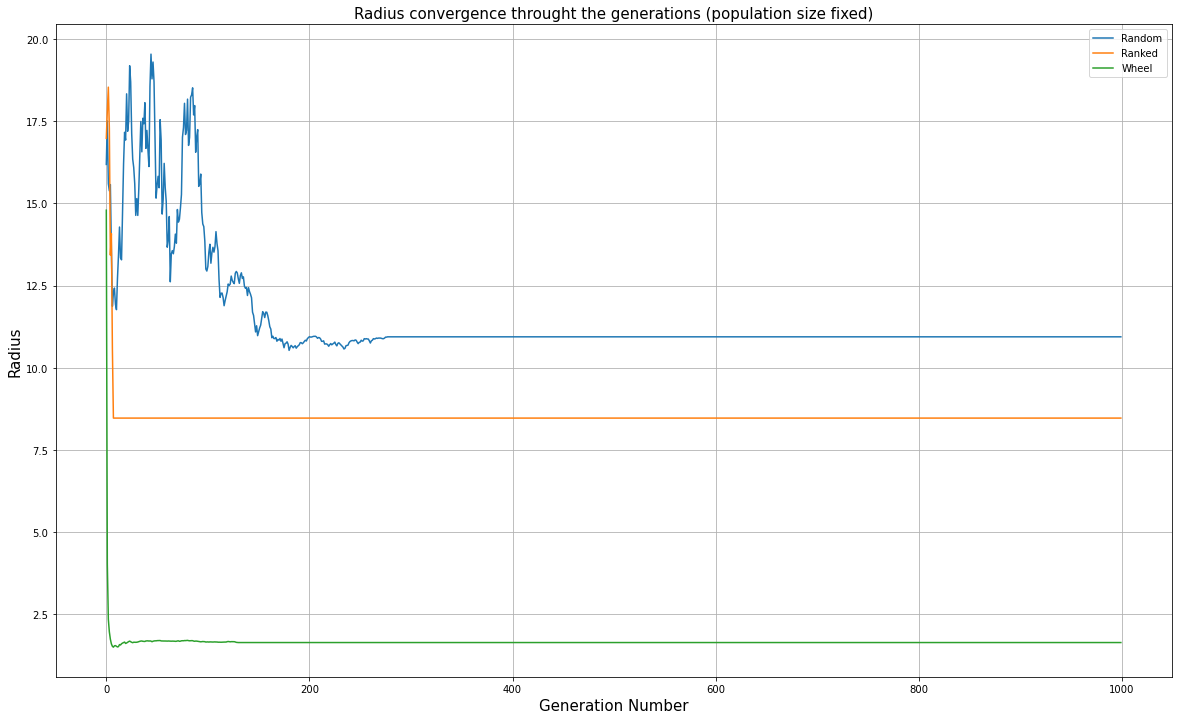

In [35]:
#grouped = generations_df.groupby(by=['selection_type', 'generation']).mean()
#create plots

plt.rcParams["figure.figsize"]=(20,12)

x1 = range(len(grouped.loc['Random Selection', 'fitness']))
y1 = grouped.loc['Random Selection', 'radius']
y2 = grouped.loc['Ranked Selection', 'radius']
y3 = grouped.loc['Wheel Selection', 'radius']

plt.title('Radius convergence throught the generations (population size fixed)',fontsize=15)
plt.xlabel('Generation Number',fontsize=15)
plt.ylabel('Radius',fontsize=15)

plt.plot(x1,y1,label = 'Random')
plt.plot(x1,y2,label = 'Ranked') 
plt.plot(x1,y3, label = 'Wheel')  
plt.grid()
plt.legend()

plt.show()

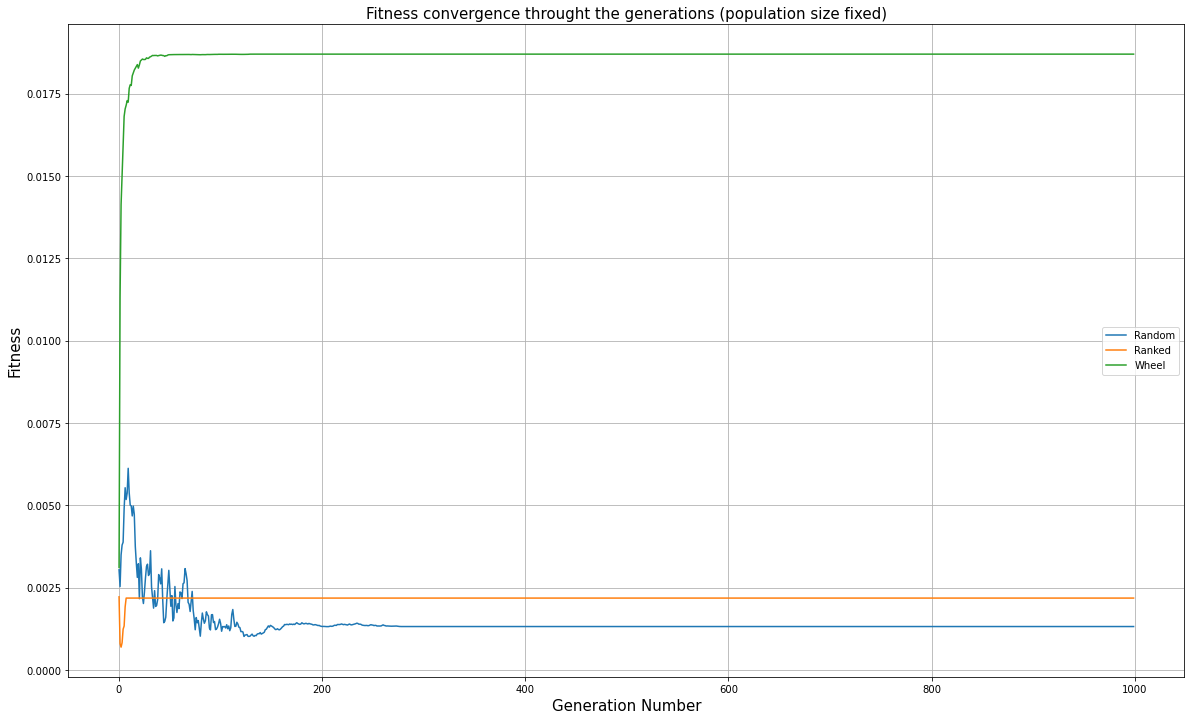

In [36]:
grouped = generations_df.groupby(by=['selection_type', 'generation']).mean()
#create plots

plt.rcParams["figure.figsize"]=(20,12)

x1 = range(len(grouped.loc['Random Selection', 'fitness']))
y1 = grouped.loc['Random Selection', 'fitness']
y2 = grouped.loc['Ranked Selection', 'fitness']
y3 = grouped.loc['Wheel Selection', 'fitness']

plt.title('Fitness convergence throught the generations (population size fixed)',fontsize=15)
plt.xlabel('Generation Number',fontsize=15)
plt.ylabel('Fitness',fontsize=15)

plt.plot(x1,y1,label = 'Random')
plt.plot(x1,y2,label = 'Ranked') 
plt.plot(x1,y3, label = 'Wheel')  
plt.grid()
plt.legend()

plt.show()